# Filtracja bilateralna

## Konwolucja obrazu z filtrem o zadanych współczynnikach

Splot (konwolucję) obrazu wejściowego $I$ z filtrem $\psi$ dla ustalonego punktu obrazu $\mathbf{x}$ można przedstawić następująco:

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||)I(\mathbf{p})
\tag{1}
\end{equation}

gdzie:
- $\hat{I}$ jest obrazem wynikowym (przefiltrowanym),
- $W_N = \sum_y \psi(y)$ jest parametrem normalizującym współczynniki filtra $\psi$,
- $||\cdot||$ jest odległością między punktami obrazu $\mathbf{x}$ i $\mathbf{p}$ według ustalonej metryki (np. norma $L_2$). Uwaga, proszę pamiętać, że zarówno $\mathbf{x}$, jak i $\mathbf{p}$ to współrzędne przestrzenne,
- $\eta(\mathbf{x})$ jest otoczeniem punktu $\mathbf{x}$.

Funkcja $\psi$ decyduje o charakterze filtracji. Dla filtru Gaussowskiego:

\begin{equation}
\psi(y) = G_{\delta_s}(y)
\tag{2}
\end{equation}

gdzie: $G_{\delta_s}(y)$ jest funkcją Gaussa z parametrem skali $\delta_s$.

Opisaną powyżej filtrację realizowaliśmy w ramach ćwiczenia "Przetwarzanie wstępne. Filtracja kontekstowa."

## Filtracja bilateralna

Wadą klasycznego splotu jest brak adaptacji współczynników filtra do lokalnego otoczenia $\eta(\mathbf{x})$ filtrowanego punktu $\mathbf{x}$.
Oznacza to wykorzystanie tych samych współczynników filtra $\psi$ niezależnie od tego czy otoczenie jest względnie jednorodne lub zawiera krawędzie obiektów (w tym przypadku dochodzi do "rozmywania" krawędzi).
Filtracja bilateralna uwzględnia lokalne otoczenie filtrowanego punktu, w ten sposób, że parametry filtra zmieniają się w zależności od "wyglądu" otoczenia.


Współczynniki filtra obliczane są na podstawie odległości filtrowanego punktu $\mathbf{x}$ od każdego punktu otoczenia $\mathbf{p}$ w dziedzinie przestrzennej obrazu (tak jak przy typowym filtrze np. Gaussa) oraz odległości punktów w przeciwdziedzinie obrazu (np. na podstawie różnicy w jasności pikseli dla obrazu w odcieniach szarości):

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||) \gamma(|I(\mathbf{p}) - I(\mathbf{x})|) I(\mathbf{p})
\tag{3}
\end{equation}
gdzie:
- $W_N$ jest współczynnikiem normalizującym filtr,
- $\gamma$ jest funkcją odległości w przeciwdziedzinie obrazu, np. $\gamma(y)=\exp(-\frac{y^2}{2\delta_r^2})$
- parametr $\delta_r$ jest utożsamiany z poziomem szumu w obrazie i należy go dobrać w sposób empiryczny.

Proszę chwilę zastanowić się nad powyższym równaniem, w szczególności nad funkcją $\gamma$. Proszę wyznaczyć, jaka będzie wartość funkcji dla pikseli podobnych (różnica 0, 1, 2), a skrajnie różnych (255, 200).

##  Realizacja ćwiczenia

### Wczytanie danych

1. Wczytaj dane z pliku *MR_data.mat*. W tym celu wykorzystaj funkcję `loadmat` z pakietu scipy:
        from scipy.io import loadmat
        mat = loadmat('MR_data.mat')

2. Wczytany plik zawiera 5 obrazów: *I_noisefree*, *I_noisy1*, *I_noisy2*, *I_noisy3* oraz *I_noisy4*. Odczytać je można w następujący sposób:
        Input = mat['I_noisy1']

3. Wyświetl wybrany obraz z pliku *MR_data.mat*. Zagadka - co to za obrazowanie medyczne?

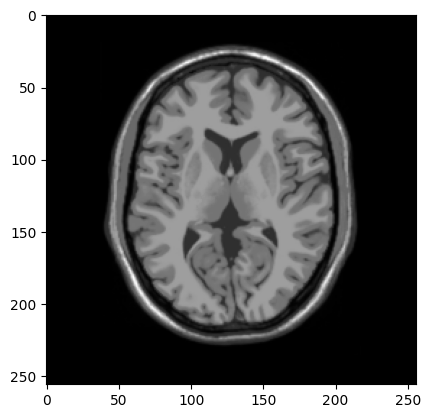

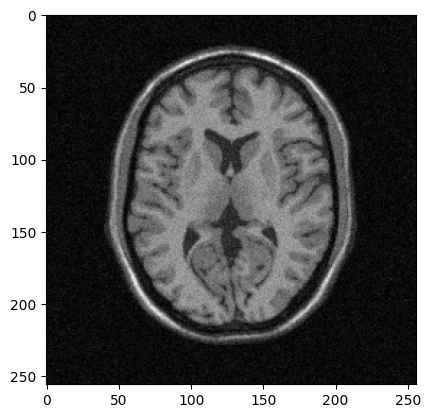

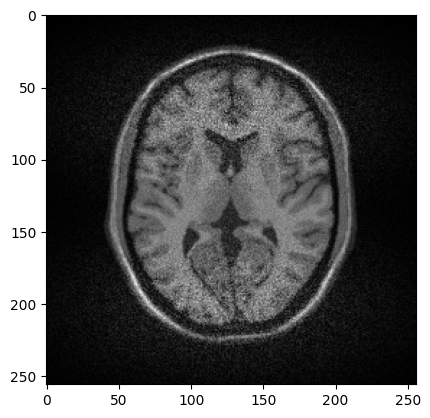

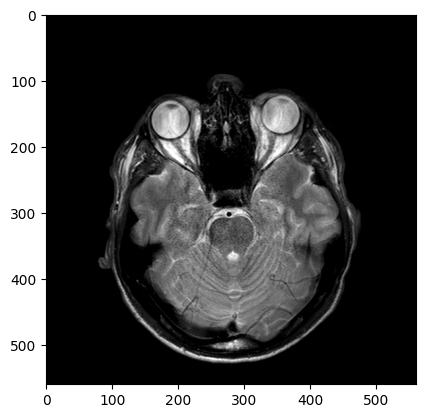

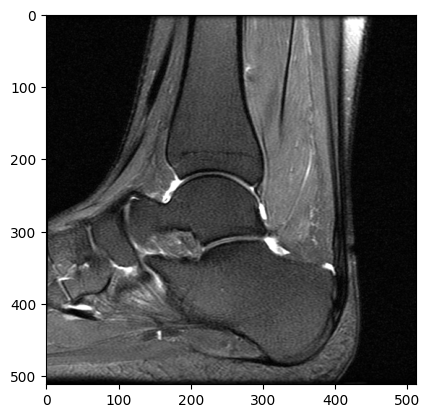

In [123]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import loadmat
import math
import os
from scipy import signal


if not os.path.exists("MR_data.mat") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/07_Bilateral/MR_data.mat --no-check-certificate
mat=loadmat('MR_data.mat')


l_noisefree=mat['I_noisefree']
l_noisy1=mat['I_noisy1']
l_noisy2=mat['I_noisy2']
l_noisy3=mat['I_noisy3']
L_noisy4=mat['I_noisy4']

for x in [l_noisefree, l_noisy1, l_noisy2, l_noisy3, L_noisy4]:
    plt.imshow(x, cmap='gray')
    plt.show()
#TODO Samodzielna



### "Klasyczna" konwolucja

1. Zdefiniuj parametry filtra Gaussowskiego: rozmiar okna i wariancję $\delta_S$.
2. Oblicz współczynniki filtra na podstawie zdefiniowanych parametrów (najprościej w ramach podwójnej pętli for).
2. Sprawdź ich poprawność i zwizualizuj filtr (tak jak w ćwiczeniu pt. "Przetwarzanie wstępne. Filtracja kontekstowa.").
3. Wykonaj kopię obrazu wejściowego: `IConv = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentem tej funkcji są aktualnie przetwarzane okno i współczynniki filtra.
7. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
8. Wyświetl wynik filtracji.
9. Porównaj wynik z obrazem oryginalnym.

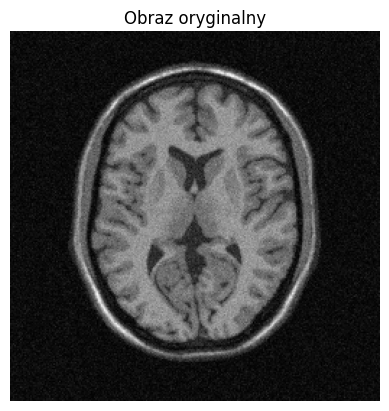

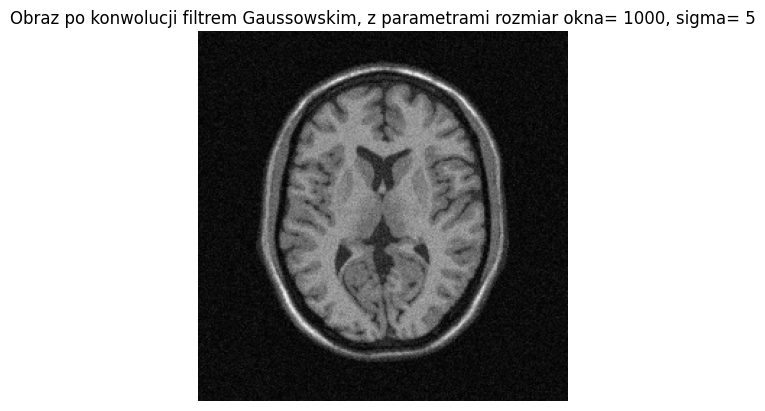

In [124]:
#TODO Samodzielna

def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 

def fgaussian_bez(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g 

nois1=signal.convolve2d(l_noisy1,fgaussian(5,0.7),mode='same')

window_size=1000
sigma=5




def pixel_out(window, filter, variance):
    window_height, window_width = window.shape
    pixel_value = 0
    center = [window_height // 2, window_width // 2]

    for i in range(window_height):
        for j in range(window_width):
            distance = np.sqrt(((center[0] - i) ** 2) + ((center[1] - j) ** 2))
            gaussian_value = np.exp(-(distance ** 2) / (2 * (variance ** 2)))
            pixel_value += gaussian_value * window[i, j]

    pixel_value /= filter.sum()
    return pixel_value
     

def convolve_image_with_window(image, window_size, variance):
    gaussian_filter = fgaussian_bez(5, variance)  
    convolved_image = image.copy()
    image_height, image_width = convolved_image.shape
    half_window_size = window_size // 2

    for row in range(half_window_size, image_height - half_window_size):
        for col in range(half_window_size, image_width - half_window_size):
            window = convolved_image[row - half_window_size:row + half_window_size + 1, 
                                     col - half_window_size:col + half_window_size + 1]
            new_pixel_value = pixel_out(window, gaussian_filter, variance)
            convolved_image[row, col] = new_pixel_value

    return convolved_image


wynik= convolve_image_with_window(l_noisy1, window_size, sigma)


plt.imshow(l_noisy1, cmap='gray')
plt.title('Obraz oryginalny')
plt.axis('off')
plt.show()
plt.imshow(wynik, cmap='gray')
plt.title(f'Obraz po konwolucji filtrem Gaussowskim, z parametrami rozmiar okna= {window_size}, sigma= {sigma}')
plt.axis('off')
plt.show()


### Filtracja bilateralna

1. Zdefiniuj dodatkowy parametr: wariancję $\delta_R$.
3. Wykonaj kopię obrazu wejściowego: `IBilateral = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentami funkcji są aktualnie przetwarzane okno, współczynniki filtra gaussowskiego (takie same jak wcześniej) i wariancja $\delta_R$.
7. Oblicz odległość w przeciwdziedzinie (dla wartości pikseli).
8. Oblicz funkcję Gaussa dla obliczonych odległości z zadanym parametrem.
9. Wykonaj normalizację obliczonych współczynników.
10. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
11. Wyświetl wynik filtracji.
12. Porównaj wynik z obrazem oryginalnym.

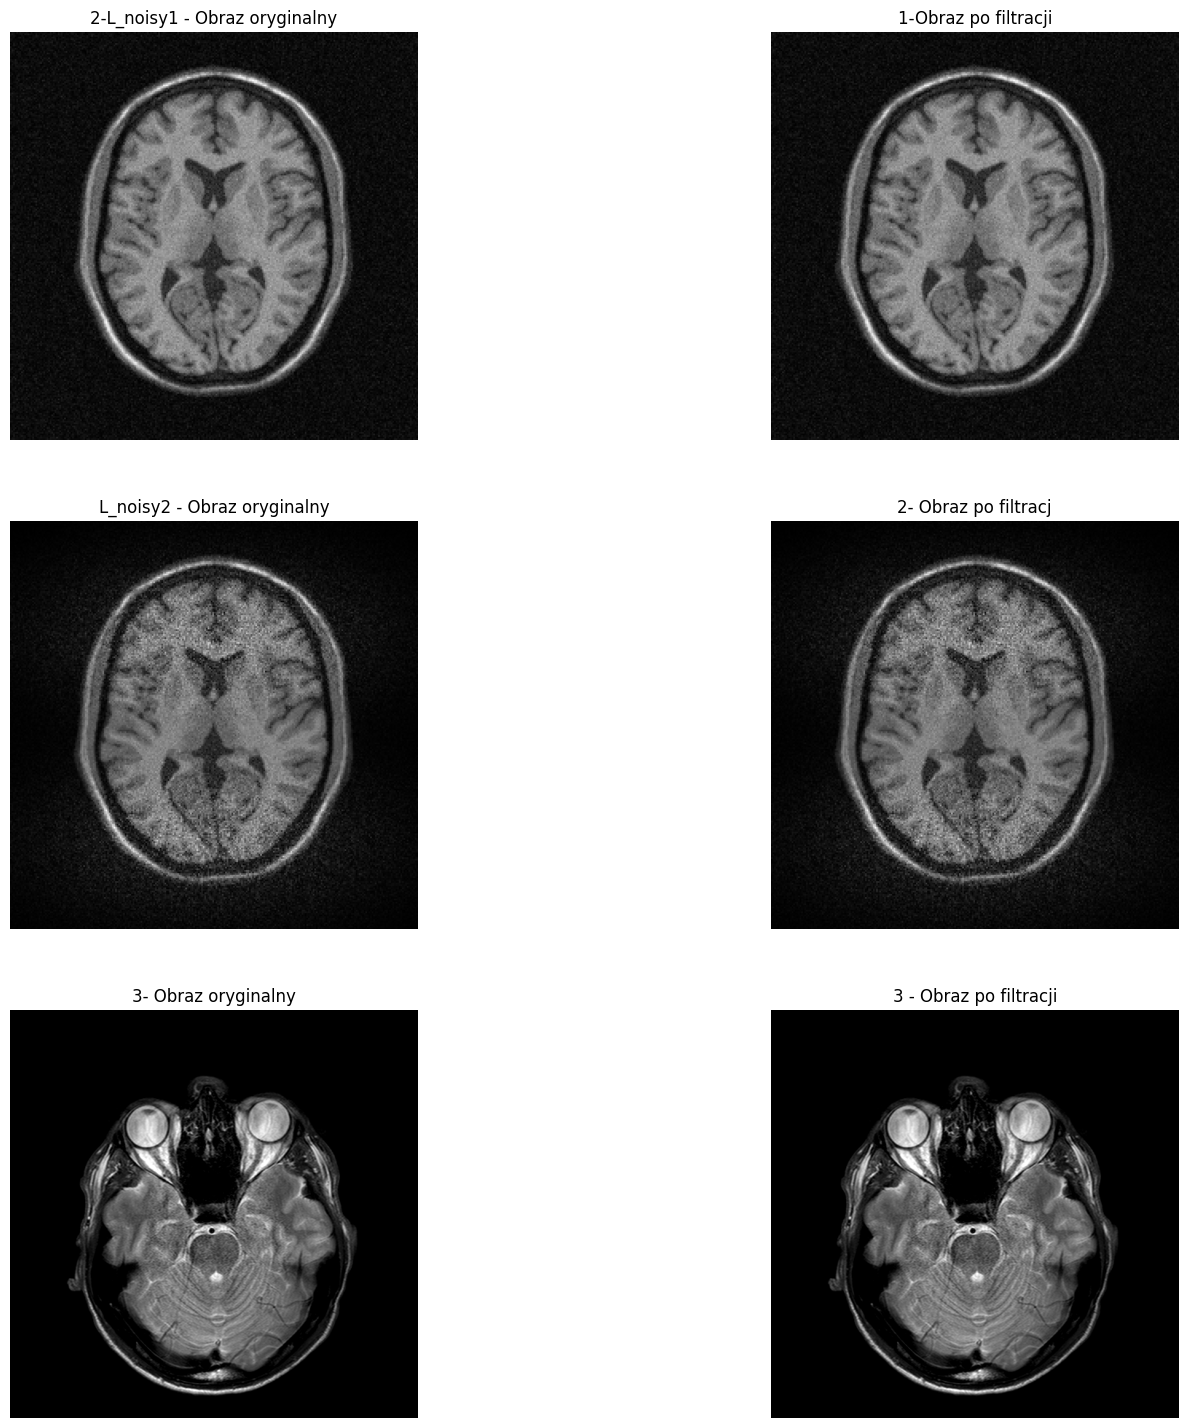

In [125]:


def pixel_out_2(window, filter, variance, delta_r):
    window_height, window_width = window.shape
    pixel_value = 0
    normalization = 0
    center_pixel_coords = [window_height // 2, window_width // 2]

    for row in range(window_height):
        for col in range(window_width):
            distance_to_center = np.sqrt(((center_pixel_coords[0] - row) ** 2) + ((center_pixel_coords[1] - col) ** 2))
            gaussian_distance = np.exp(-(distance_to_center ** 2) / (2 * (variance ** 2)))
            
            pixel_intensity_difference = np.abs(window[center_pixel_coords[0], center_pixel_coords[1]] - window[row, col])
            gaussian_intensity_difference = np.exp(-(pixel_intensity_difference ** 2) / (2 * (delta_r ** 2)))
            
            pixel_value += gaussian_distance * gaussian_intensity_difference * window[row, col]
            normalization += gaussian_distance * gaussian_intensity_difference

    pixel_value /= normalization
    return pixel_value


def bilateral_filter(image, window_size, spatial_variance, intensity_variance):
    gaussian_filter = fgaussian_bez(window_size, spatial_variance)
    filtered_image = image.copy()
    image_height, image_width = filtered_image.shape
    half_window = window_size // 2

    for row in range(half_window, image_height - half_window):
        for col in range(half_window, image_width - half_window):
            window = filtered_image[row - half_window:row + half_window + 1, 
                                    col - half_window:col + half_window + 1]
            new_pixel_value = pixel_out_2(window, gaussian_filter, spatial_variance, intensity_variance)
            filtered_image[row, col] = new_pixel_value

    return filtered_image


delta_r=300
variancy_1=0.9


filtered_image_1 = bilateral_filter(l_noisy1, window_size, variancy_1, delta_r)
filtered_image_2 = bilateral_filter(l_noisy2, window_size, variancy_1, delta_r)
filtered_image_3 = bilateral_filter(l_noisy3, window_size, variancy_1, delta_r)
filtered_image_4 = bilateral_filter(L_noisy4, window_size, variancy_1, delta_r)
noise_free_image = l_noisefree

# Wyświetlamy obrazy
plt.figure(figsize=(18, 18))

plt.subplot(3, 2, 1)
plt.imshow(l_noisy1, cmap='gray')
plt.title('2-L_noisy1 - Obraz oryginalny')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(filtered_image_1, cmap='gray')
plt.title('1-Obraz po filtracji')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(l_noisy2, cmap='gray')
plt.title('L_noisy2 - Obraz oryginalny')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(filtered_image_2, cmap='gray')
plt.title('2- Obraz po filtracj')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(l_noisy3, cmap='gray')
plt.title('3- Obraz oryginalny')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(filtered_image_3, cmap='gray')
plt.title('3 - Obraz po filtracji')
plt.axis('off')

plt.show()